# Axis Insurance Claim Statistical Analysis

**Description**  

**Context -** Leveraging customer information is of paramount importance for most businesses. In the case of an insurance company, the attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing how to explore and generate value out of such data can be an invaluable skill to have.

**Objective –** Statistical Analysis of Insurance CLaim Data. Explore the dataset and extract insights from the data. The idea is to perform statistical tests to answer hypotheses posed about the data.

**Analysis Goals -**

1. Explore the dataset and extract insights using Exploratory Data Analysis.
2. Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't. [Formulate a hypothesis and prove/disprove it]
3. Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.
4. Is the proportion of smokers significantly different across different regions? [Create a contingency table/cross tab, using the function : stats.chi2_contingency()]
5. Is the mean BMI of women with no children, one child, and two children the same? Explain the answer with statistical evidence.

*A significance level of 0.05 is the criteria for all tests.


**Data Dictionary –**

* `Age` - This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).
* `Sex` - This is the policy holder's gender, either male or female.
* `BMI` - This is the body mass index (BMI), which provides a sense of how over or underweight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9.
* `Children` - This is an integer indicating the number of children/dependents covered by the insurance plan.
* `Smoker` - This is yes or no depending on whether the insured regularly smokes tobacco.
* `Region` - This is the beneficiary's place of residence in the U.S., divided into four geographic regions - northeast, southeast, southwest, or northwest.
* `Charges`​ - Individual medical costs billed to health insurance

## Import Libraries and Setup Environment

In [2]:
# Import libraries for analysis
import pandas as pd
import numpy as np

# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True) # used for nicer overlay in plots
# enable inline plots in jupyter
%matplotlib inline 

# Statistical testing module
import scipy.stats as stats

# Library to supresses the warnings
import warnings
warnings.filterwarnings('ignore') 

### Connect to Cloud Drive

In [3]:
# How to import from Google drive into Google Colab
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Changes the working directory to my Google Drive
# had to escape the blanks with \ symbols
%cd /content/drive/My\ Drive/UT\ AIML/Statistical\ Learning/ 

/content/drive/My Drive/UT AIML/Statistical Learning


### Import Data

In [5]:
# Read the data using pandas
df = pd.read_csv('AxisInsurance.csv')

## Overview of the Data

### View the first and last 10 rows of the data

In [6]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [7]:
df.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


### Check the Shape of the Data

In [8]:
# Checks the number of rows and columns in the dataset 
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 1338 rows and 7 columns.


### Check the Datatypes of Each Column

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


* The columns `sex`, `smoker`, and `region` can be changed to category datatype to both align with function requirements and to reduce the memory space required. 


### Fixing Datatypes

In [10]:
cat_cols = ['sex', 'smoker', 'region']

for column in cat_cols:
    df[column]=df[column].astype('category')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.2 KB


* The memory space has reduced from 73.3KB to 46.2KB and the categorical variables are now the proper datatype. 

### Check for Missing Data

In [12]:
# Displays the null values in the form of a percentage
print(df.isna().mean().round(4) * 100)

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64


* There are no missing values (0%) in the dataset. 

### Summary of Continuous Variables

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


* `age` - The mean and median (50%) align closely suggesting this distribution is normal and not skewed either direction. 
* `bmi` - The distribution also have a mean and median which are close and is likely normally distributed. 
* `children` - The range of number of children is from 1 to 5 and this distribution may be slightly right skewed given the small difference between the first 3 quartiles.
* `charges` - This distribution looks to be right skewed given the mean (13270.422265) is so much greate than the median (9382.033)

### Summary of Categorical Variables

In [14]:
df.describe(include=["category"]).T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


* `sex` - Male is the most common gender in the dataset (676), but is only slightly more common than female (662). 
* `smoker` - Non-smokers are by far the most frequent in the dataset (1,064). 
* `region` - Southwest is the most frequently occuring region in the dataset, accounting for just over (27%) of all regions. 


## 1) Exploratory Data Analysis

### Univariate Analysis

In [15]:
# This function takes the numerical column as the input and returns the boxplot 
# on top of histogram of the variable.
# The boxplot and a histogram are along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot on top of a histogram for numerical data

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

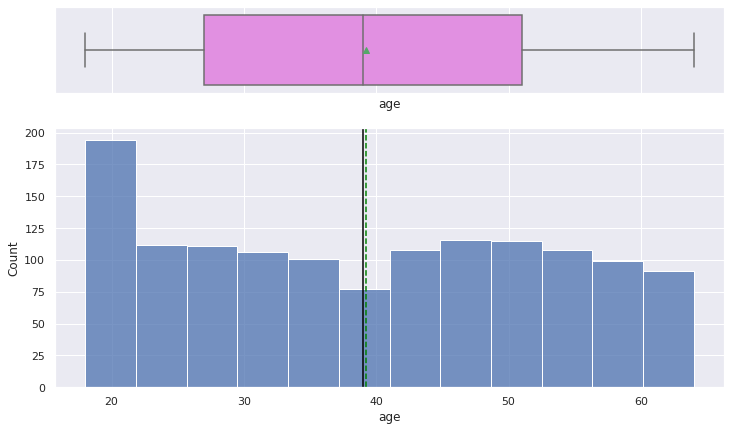

In [16]:
histogram_boxplot(df, "age")

* `age` - The distribution is bi-modal with average age being the least frequent in the data. The left side of the distriubtion skews towards the right, with the early 20's being the most frequently insured. The right side of the distribution is more normally distributed among older age groups. 

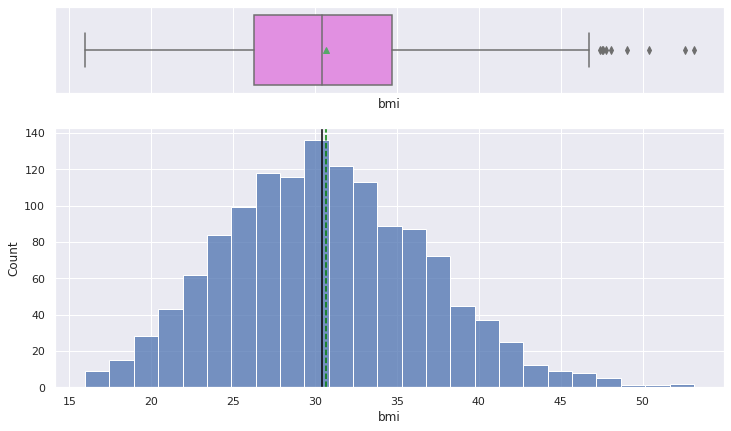

In [17]:
histogram_boxplot(df, "bmi")

* `bmi` - This is a normal distribution with a handful of outliers to the right of the mean.

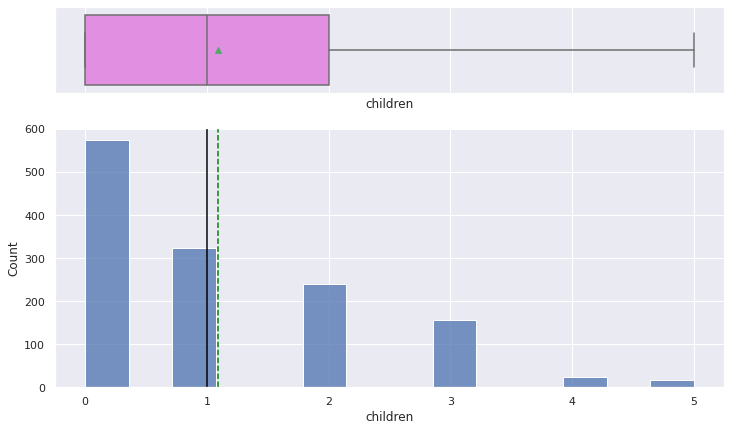

In [18]:
histogram_boxplot(df, "children")

* `children` - The distribution is slightly right skewed due to the ourliers to the right of the mean and median. The majority of the insured do not have any children. 

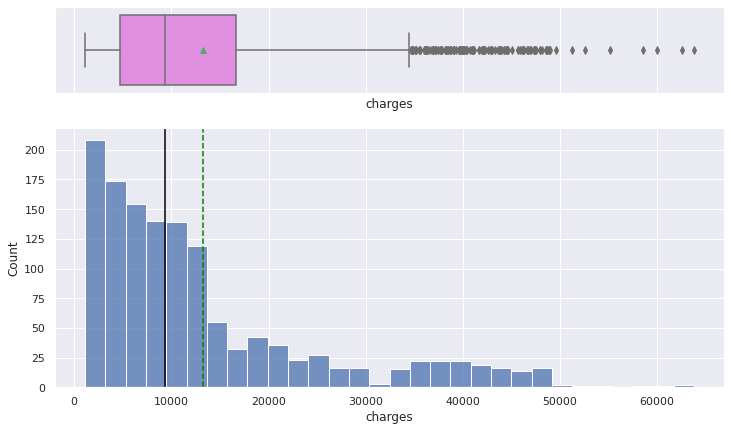

In [19]:
histogram_boxplot(df, "charges")

* `charges` - The distribution is right skewed with several outliers to the right of the mean and median. 

In [20]:
# Fucntion to create labeled bar plots with percentages
# for each categorical variable


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

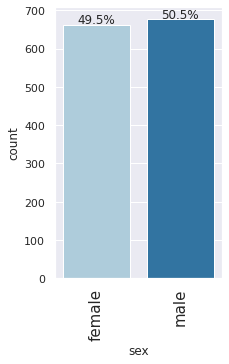

In [21]:
labeled_barplot(df, "sex", perc=True)

* `sex` - The gender category is divided almost equally between maels and females with only slightly more males (50.5% to 49.5%).

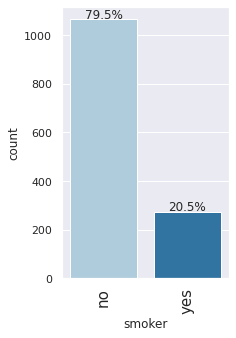

In [22]:
labeled_barplot(df, "smoker", perc=True)

* `smoker` - An overwhelming number of the insured are non-smokers (79.5%) versus smokers (20.5%).

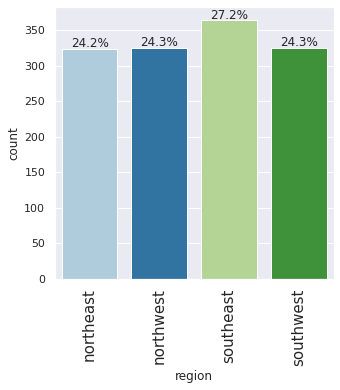

In [23]:
labeled_barplot(df, "region", perc=True)

* `region` - The regions are pretty well evenly divided, but the southeast is represented slightly more than the other regions in the dataset (27.2%). 

### Bivariate Analysis

In [24]:
# Creates a correlation matrix across all the columns
df_corr = df.corr()
df_corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


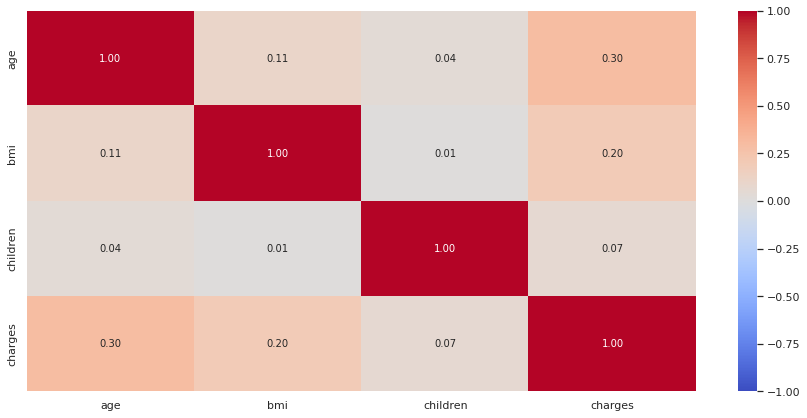

In [25]:
# Set diverging color palette to make the visual more pleasing
sns.color_palette("crest", as_cmap=True)
plt.figure(figsize=(15, 7))
sns.heatmap(df_corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="coolwarm")
plt.show()

* There's a slight positive correlation between `charges` and `age`. There is also a relatively small positive correlation between `bmi` and `charges`. There are no negative correlations visible.

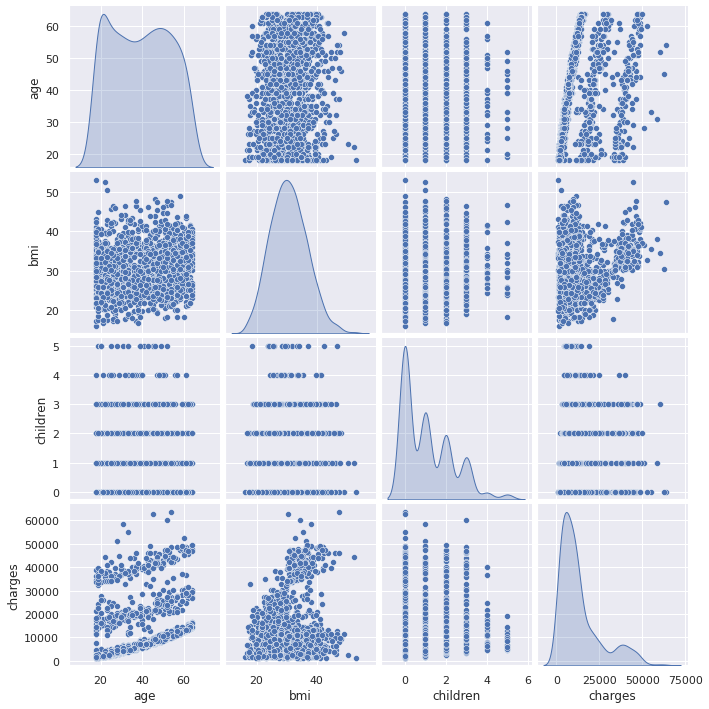

In [26]:
sns.pairplot(df, diag_kind="kde")
plt.show()

* The most prominent association we can see in the pairplot is between charges and bmi. As bmi increase, charges also seem to increase. 

## 2) Prove (or disprove) that medical claims made by the people who smoke is greater than those who don't.

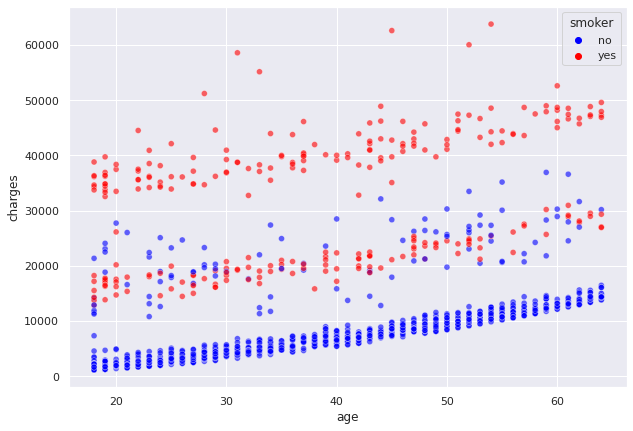

In [28]:
# Scatter plot to look for visual evidence of dependency between smoking and medical costs 
# accross different ages
plt.figure(figsize=(10,7))
sns.scatterplot(df.age, df.charges,hue=df.smoker,palette= ['blue','red'] ,alpha=0.6)
plt.show()

* There is a clear difference between the charges for smokers versus non-smoker with smokers having higher charges. 
* The reason for this is obvious since it's well known that smoking can cause a number illnesses and thus adds risk to the insured's health and additional costs to the insurance company.
* We can statistically verify the diffrence between charges for each category of smoker by running a a two sample t-test to check for the difference in means of charges for the two groups. 

### T-test for charges between smokers and non-smokers

A t-test for independence is used to compare the sample means of 2 independent populations. This will also be a one-tailed test since the alternative hypothesis tests whether there is a greater mean of charges among smokers.

Null Hypothesis = "Mean charges of smokers is less than or equal to non-smokers." 

Alternate Hypothesis = "Mean charges of smokers is greater than non-smokers." 


**Significance Level = 0.05**

In [29]:
Ho = "Mean charges of smokers is less than or equal to non-smokers" 
Ha = "Mean charges of smokers is greater than non-smokers" 


x = np.array(df[df.smoker == 'yes'].charges)  # Selecting charges corresponding to smokers as an array
y = np.array(df[df.smoker == 'no'].charges) # Selecting charges corresponding to non-smokers as an array

t, p_value  = stats.ttest_ind(x,y)  # Performing an Independent t-test


In [33]:
# Since it is one tailed test p-value is divded by 2 
p_value=p_value/2
print("Tstat:",round(t, ndigits=2),"P-value:",p_value)

Tstat: 46.66 P-value: 5.1696474013607617e-284


In [34]:
if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Mean charges of smokers is greater than non-smokers as the p_value (5.1696474013607617e-284) < 0.05


* The t-test indicates that we can confidently reject the null hypothesis and affirm that the charges for smokers is higher than that of non-smokers.

## 3) Prove (or disprove) with statistical evidence that BMI of females is different from that of males.

In [35]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

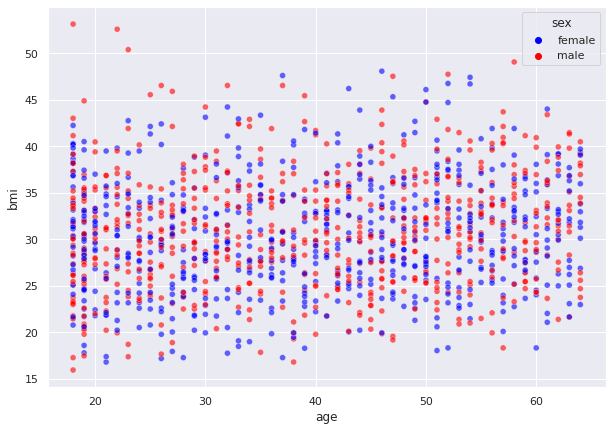

In [42]:
plt.figure(figsize=(10,7))
sns.scatterplot(df.age, df.bmi,hue=df.sex,palette= ['blue','red'] ,alpha=0.6)
plt.show()

* There does't appear to be any relationsip between gender and bmi from looking at the visualization.

In [41]:
print(f"The mean bmi for females is {round(np.mean(df[df.sex == 'female'].bmi), ndigits=2)}")
print(f"The mean bmi for males is {round(np.mean(df[df.sex == 'male'].bmi), ndigits=2)}")

The mean bmi for females is 30.38
The mean bmi for males is 30.94


* In this simply test we can see the mean bmi of males is slightly high than that of females. We can perform a t-test to see if the results are statistically significant or a product of random chance.

## T-test to check if BMI is dependent on Gender

Since we want to measure the difference between two means of indpendent populatuions (male and female), we'll again use a t-tes. This time, however, we'll perform a two-tailed test to explore whether there is either a positive or negative difference. 

Null Hypothesis = Ho = "Mean BMI of females is same as that of males" 

Alternate Hypothesis = Ha = "Mean BMI of females is different from males" 

**Significance Level = 0.05**


In [43]:
# T-test to check dependency of bmi on gender
Ho = "Female BMI is same as Male BMI"   # Null Hypothesis
Ha = "Female BMI is different from Male BMI"   # Alternative Hypothesis

x = np.array(df[df.sex == 'male'].bmi)  # Selecting bmi values corresponding to males as an array
y = np.array(df[df.sex == 'female'].bmi) # Selecting bmi values corresponding to females as an array

t, p_value  = stats.ttest_ind(x,y)  # Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print("Reject the Null Hypothesis that the Female BMI same as that of Male BMI")
else:
    print("Failed to reject the Null Hypothesis that the Female BMI is same as that of Male BMI")

Failed to reject the Null Hypothesis that the Female BMI is same as that of Male BMI


* There is no statistically significant difference between Femle BMI and Male BMI.

## 4) Is the proportion of smokers significantly different across different regions?

In [44]:
# Distribution of smokers across regions
pd.crosstab(df['smoker'],df['region'])

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


* Simply looking at the table, there appears to be slightly more smokers int he southeast region than the other regions. We will need to test whether this is statistically significant or not. 

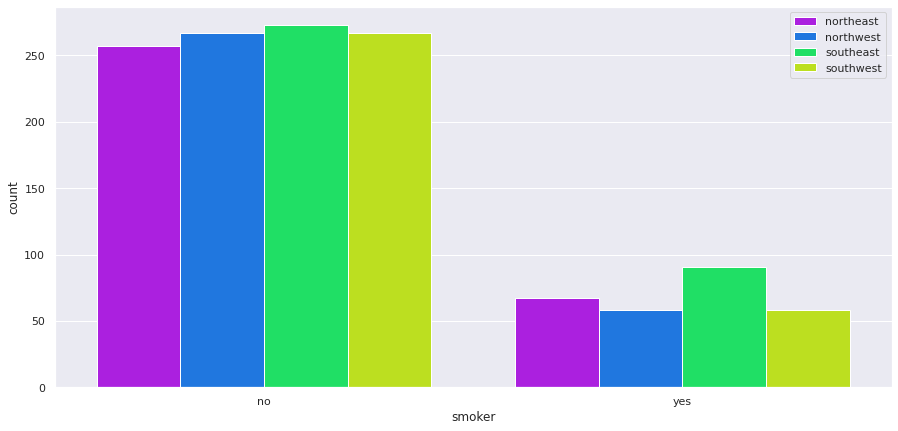

In [45]:
plt.figure(figsize=(15,7))
sns.countplot(df["smoker"],hue=df["region"],palette='hsv_r')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* The visualization itself doesn't seem to indicate there is much difference between smokers nad non-smokers across regions.

### Chi-square test of independence to determine if smoking habits are different across region

The chi-square test of independence is used to check the frequencies of a categorical variable among independent populations.

Null Hypothesis = Ho = "Region has no effect on smoking habits" 

Alternate Hypothesis = Ha = "Region has an effect on smoking habits" 

**Significance Level = 0.05**

In [48]:
# Chi_square test to check if smoking habits are different across different regions
Ho = "Region has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Region has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(df['region'],df['smoker'])  # Contingency table of region and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Region has no effect on smoking habits as the p_value (0.062) > 0.05


## 5) Is the mean BMI of women with no children, one child, and two children the same?

In [47]:
# Check the average bmi by number of children
female_df = df[df['sex'] == 'female'] # Select only females from the dataframe
female_df.groupby(['children'])['bmi'].mean() # Group by the number of children

children
0    30.361522
1    30.052658
2    30.649790
3    30.436429
4    31.943182
5    30.620625
Name: bmi, dtype: float64

* The BMI of women with various numbers of children does not look to be too different, but we'll need to test for statistically significant difference to empirically determine difference. 

### ANOVA to check whether the number of children a woman has has affects female BMI

The ANOVA test is used to compare teh sample means of multiple populations to determine whether there is a statistically significant difference among each.

Null Hypothesis = Ho = "No. of children has no effect on bmi"

Alternate Hypothesis = Ha = "No. of children has an effect on bmi"

**Significance Level = 0.05**

In [49]:
Ho = "No. of children has no effect on bmi"   # Stating the Null Hypothesis
Ha = "No. of children has an effect on bmi"   # Stating the Alternate Hypothesis

female_df = df[df['sex'] == 'female']

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']


f_stat, p_value = stats.f_oneway(zero,one,two)


if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

No. of children has no effect on bmi as the p_value (0.716) > 0.05


The BMI of women with different numbers of children does not a statistically significant difference and we fail to reject the null hypothesis. 

## Insights and Recommendations  

* BMI has a slightly positive correlation to the amount of charges the insurance company pays. The company can provide incentives to customers who maintain to healthy BMI and employ strategies to mitigate the risk of customers who have an unhealthy BMI by adjusting premiums.

* The claims made by smokers are higher than that of non-smokers and policy needs to reflect a risk mitigation strategy to ensure the premiums of smokers are commensurate with their level of risk. 

* There is no significant difference between the BMI of women with no children and women with any other number of children. A small portion of the female customer base has more than 2 children and there does not appear to be any risk of an increased level of BMI if a woman has more than one child. 